# **Importing libraries**

In [46]:
!pip install pytorch-tabnet

In [47]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import missingno as msno
np.random.seed(0)

# **Loading the dataset**

In [48]:
data = pd.read_csv("KFUH_Dataa.csv")
data.head()

,baseline_value,accelerations,uterine_contractions,early_decelerations,late_decelerations,Variable_deceleration,prolongued_decelerations,variability,fetal_Health,Unnamed: 9,Unnamed: 10
0,134.83,0.0,3.083,0.83,0.0,2.33,0.0,15.0,Suspicion,NaN,NaN
1,132.00,0.0,0.600,0.00,0.0,0.00,0.0,20.0,normal,NaN,NaN
2,119.83,3.0,0.000,0.00,0.0,0.00,0.0,23.0,Normal,NaN,NaN
3,141.00,0.0,1.000,0.00,0.0,0.84,0.0,4.0,Suspicion,NaN,NaN
4,146.16,0.0,0.000,0.00,0.0,0.16,0.0,20.0,Suspicion,NaN,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   baseline_value            205 non-null    float64
 1   accelerations             205 non-null    float64
 2   uterine_contractions      205 non-null    float64
 3   early_decelerations       205 non-null    float64
 4   late_decelerations        205 non-null    float64
 5   Variable_deceleration     205 non-null    float64
 6   prolongued_decelerations  205 non-null    float64
 7   variability               205 non-null    float64
 8   fetal_Health              205 non-null    object 
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 17.7+ KB


In [50]:
data.shape

(205, 11)

In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,205.0,137.756482,13.105419,105.833,130.00,136.670000,145.000000,180.000000
accelerations,205.0,0.461383,0.999345,0.000,0.00,0.000000,0.500000,5.000000
uterine_contractions,205.0,3.074996,2.181554,0.000,1.30,2.833333,4.333333,12.000000
early_decelerations,205.0,0.054553,0.211115,0.000,0.00,0.000000,0.000000,1.333333
late_decelerations,205.0,0.065042,0.432664,0.000,0.00,0.000000,0.000000,4.000000
Variable_deceleration,205.0,2.107959,3.925440,0.000,0.21,1.000000,2.100000,25.000000
prolongued_decelerations,205.0,0.358753,0.796604,0.000,0.00,0.000000,0.300000,5.000000
variability,205.0,12.668137,8.185108,1.300,7.80,11.660000,16.000000,68.166667
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data.drop(data.columns[[9, 10]], axis=1, inplace=True)

In [55]:
data.nunique()

baseline_value              98
accelerations               34
uterine_contractions        94
early_decelerations          9
late_decelerations           7
Variable_deceleration       86
prolongued_decelerations    21
variability                 95
fetal_Health                 9
dtype: int64

# **handle** **null** **values**

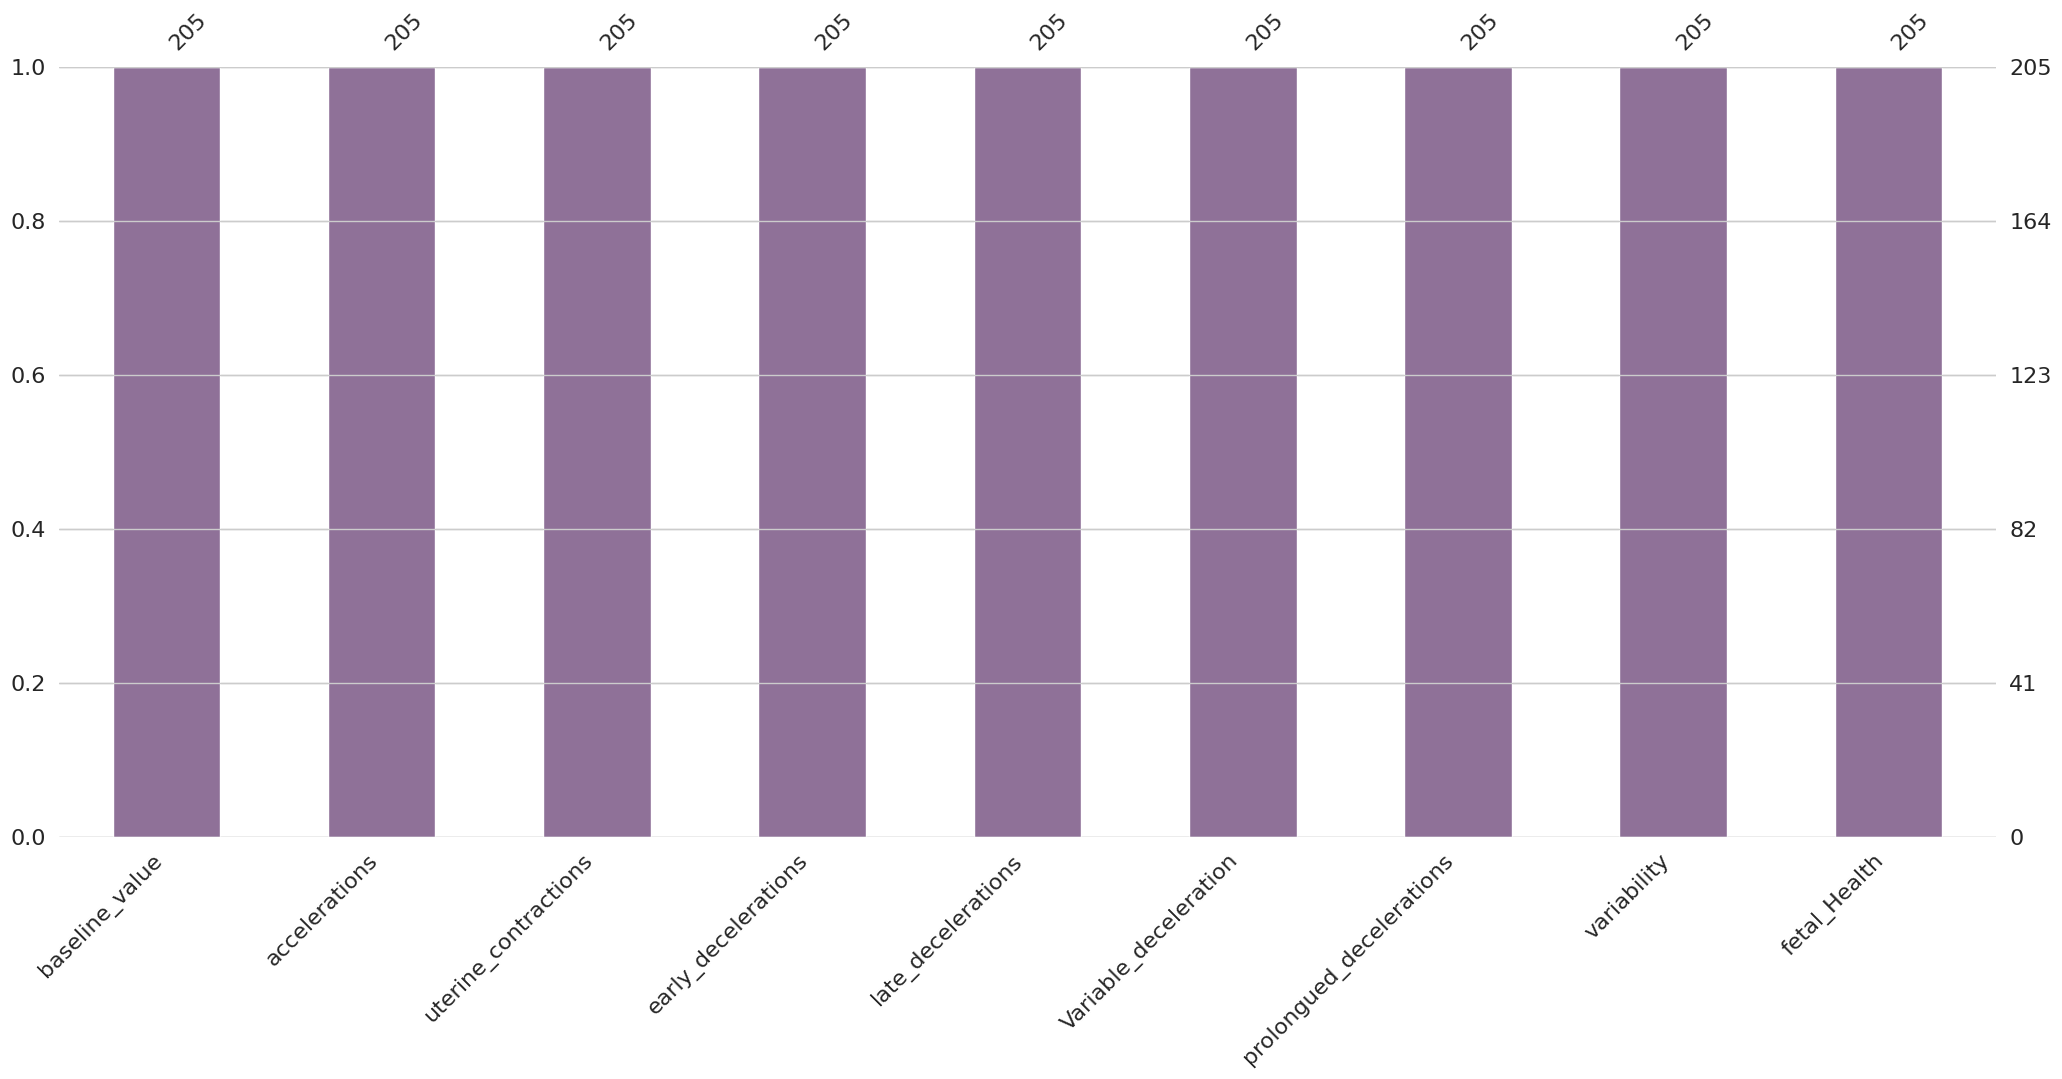

In [57]:
import missingno as msno
import matplotlib.pyplot as plt

null_plot = msno.bar(data, color="#8f7198")
plt.savefig("missing_data_graph.png")
#Bar Chart :This bar chart gives us an idea about how many missing values are there in each column.

In [58]:
# Calculate percentage of missing values in each column
null_percentage = data.isnull().sum() / len(data) * 100
print(null_percentage)

baseline_value              0.0
accelerations               0.0
uterine_contractions        0.0
early_decelerations         0.0
late_decelerations          0.0
Variable_deceleration       0.0
prolongued_decelerations    0.0
variability                 0.0
fetal_Health                0.0
dtype: float64


In [59]:
duplicateds = data.copy()
duplicateds.drop_duplicates(inplace= True)
print("sum of duplicated = ", data.duplicated().sum())
print("is the data not duplicated")
data = duplicateds.copy()
print("sum of duplicated = " , data.duplicated().sum())
data.duplicated().sum()

sum of duplicated =  0
is the data not duplicated
sum of duplicated =  0


0

<Axes: >

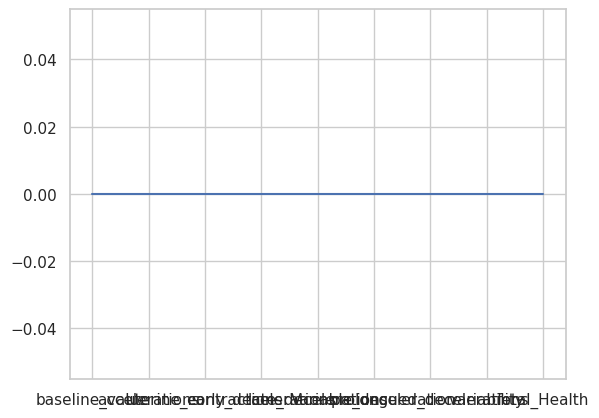

In [60]:
data.isnull().sum().plot()

In [61]:
data['fetal_Health'].unique()

array(['Suspicion', 'normal', 'Normal', 'pathologic', 'suspicion',
       'suspicion ', 'normal ', 'Normal ', 'pathologic '], dtype=object)

In [62]:
data.shape

(205, 9)

In [63]:
data

,baseline_value,accelerations,uterine_contractions,early_decelerations,late_decelerations,Variable_deceleration,prolongued_decelerations,variability,fetal_Health
0,134.830000,0.000000,3.083000,0.83,0.0,2.330000,0.0,15.000000,Suspicion
1,132.000000,0.000000,0.600000,0.00,0.0,0.000000,0.0,20.000000,normal
2,119.830000,3.000000,0.000000,0.00,0.0,0.000000,0.0,23.000000,Normal
3,141.000000,0.000000,1.000000,0.00,0.0,0.840000,0.0,4.000000,Suspicion
4,146.160000,0.000000,0.000000,0.00,0.0,0.160000,0.0,20.000000,Suspicion
...,...,...,...,...,...,...,...,...,...
200,132.448110,0.000000,1.281095,0.00,0.0,0.328828,4.0,3.000000,pathologic
201,132.356128,0.589681,1.314611,0.00,0.0,0.000000,0.0,10.916595,normal
202,132.165482,0.000000,1.328157,0.00,0.0,0.335349,0.0,10.840194,suspicion
203,132.068063,0.563840,1.323590,0.00,0.0,0.000000,0.0,10.872587,normal


In [64]:
data['fetal_Health'] = data['fetal_Health'].str.strip().str.capitalize()

In [65]:
category_mapping = {
    'Suspicion': 2,
    'Normal': 1,
    'Pathologic': 3
}

# Apply the mapping to the DataFrame
data['fetal_Health'] = data['fetal_Health'].map(category_mapping)

# Verify the transformation
print(data['fetal_Health'].unique())

[2 1 3]


# **correlation matrix**

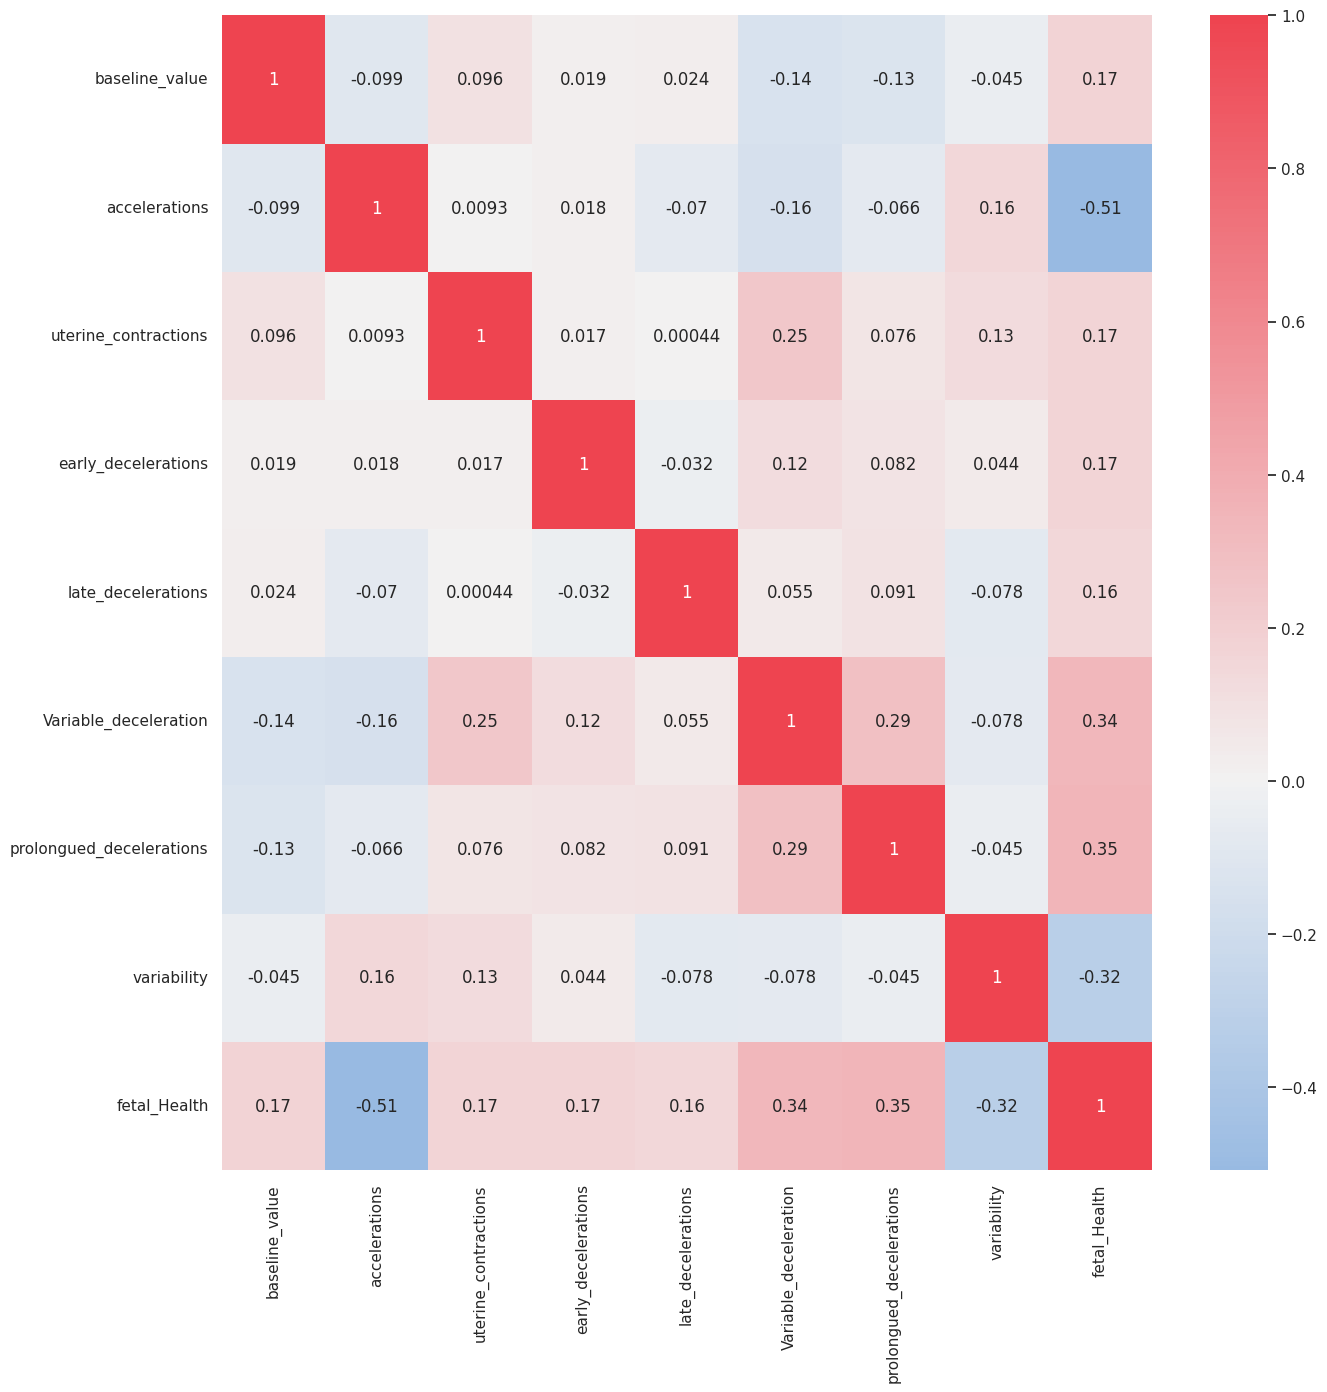

In [66]:
corrmat= data.corr()
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.savefig('correlation_matrix_heatmap.png')

<Axes: xlabel='accelerations', ylabel='variability'>

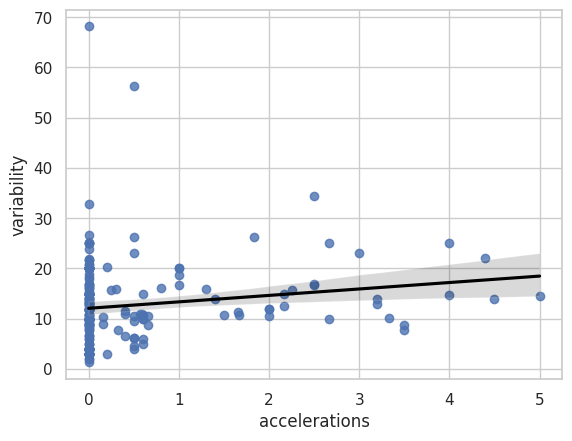

In [67]:
sns.regplot(x=data['accelerations'], y=data['variability'], line_kws={"color":'black'})

<Axes: xlabel='accelerations', ylabel='baseline_value'>

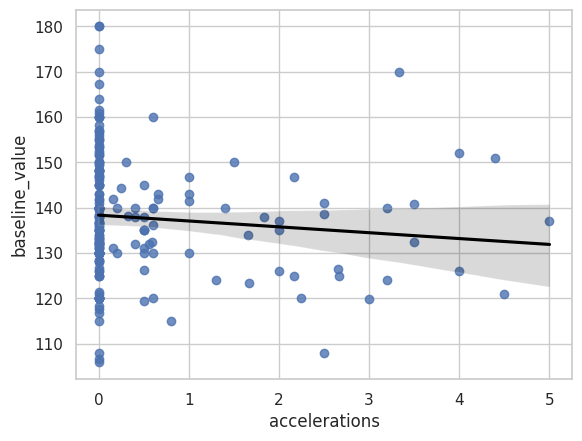

In [68]:
sns.regplot(x=data['accelerations'], y=data['baseline_value'], line_kws={"color":'black'})

<Axes: xlabel='prolongued_decelerations', ylabel='baseline_value'>

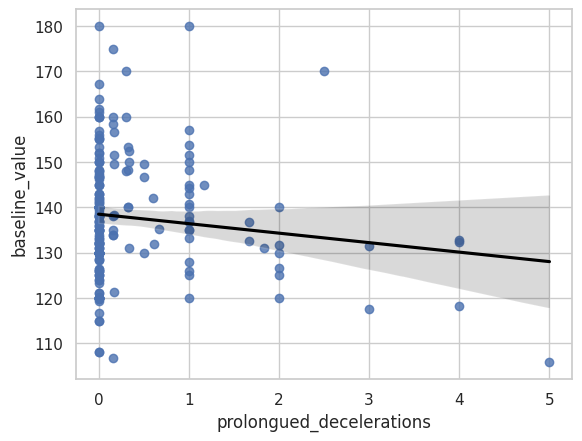

In [69]:
sns.regplot(x=data['prolongued_decelerations'], y=data['baseline_value'], line_kws={"color":'black'})

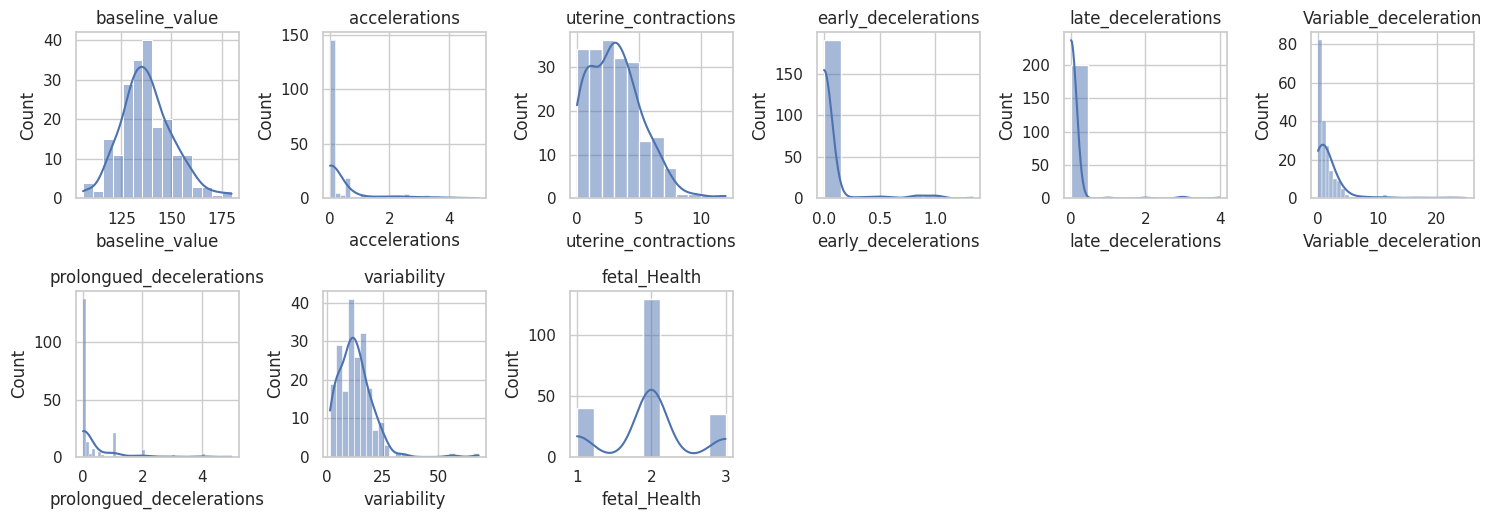

In [70]:
# Histograms for all numeric variables
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

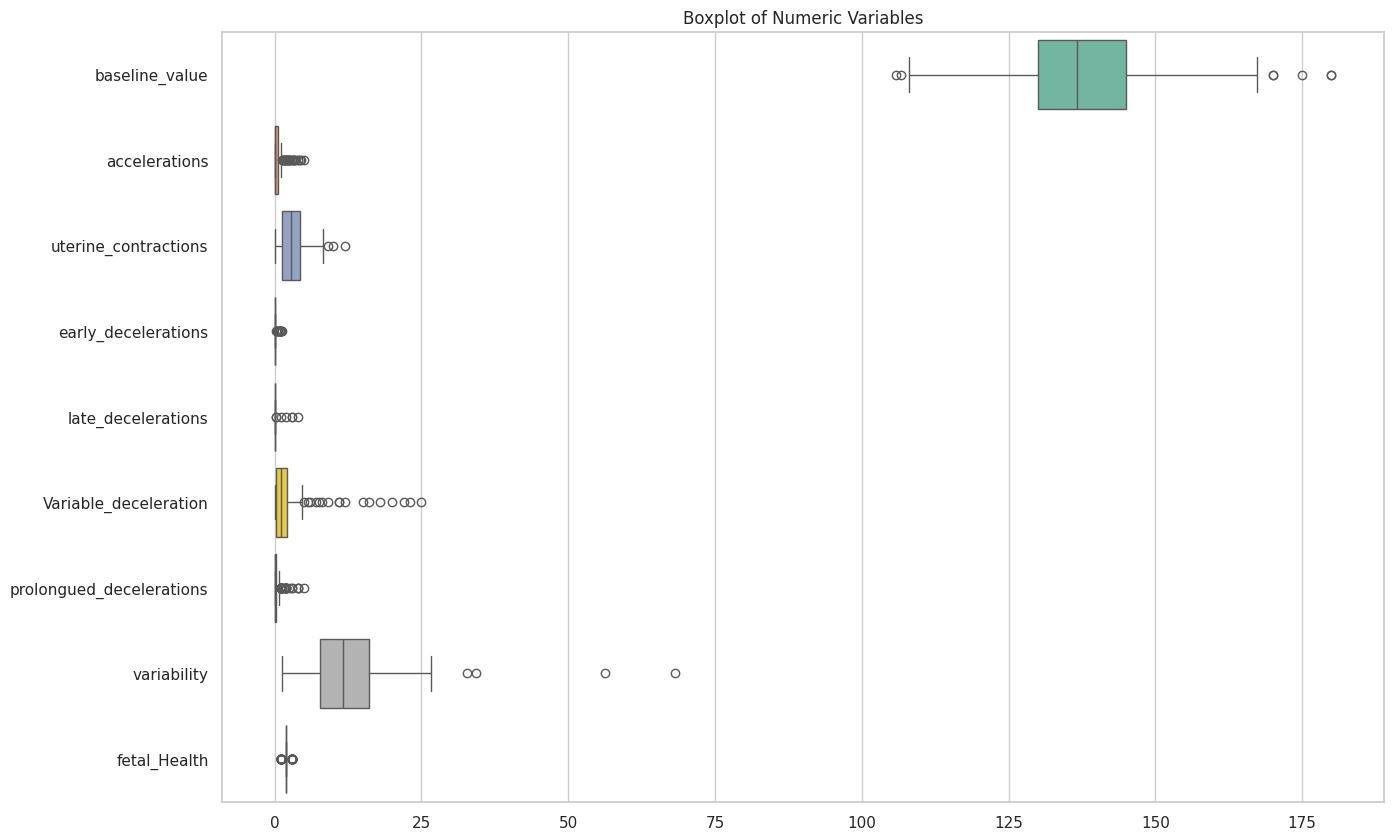

In [71]:
# Boxplots for all numeric variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Boxplot of Numeric Variables")
plt.show()


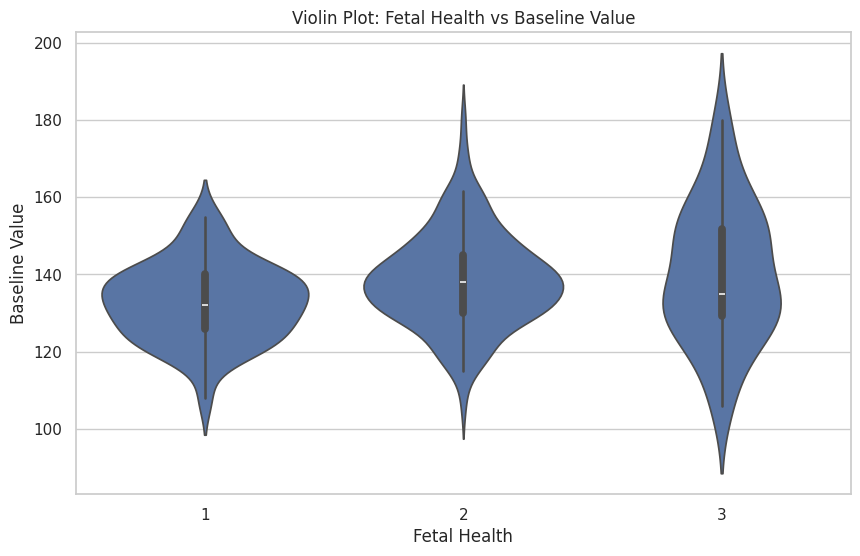

In [72]:
# Violin Plot for categorical variable
plt.figure(figsize=(10, 6))
sns.violinplot(x='fetal_Health', y='baseline_value', data=data)
plt.title("Violin Plot: Fetal Health vs Baseline Value")
plt.xlabel("Fetal Health")
plt.ylabel("Baseline Value")
plt.show()


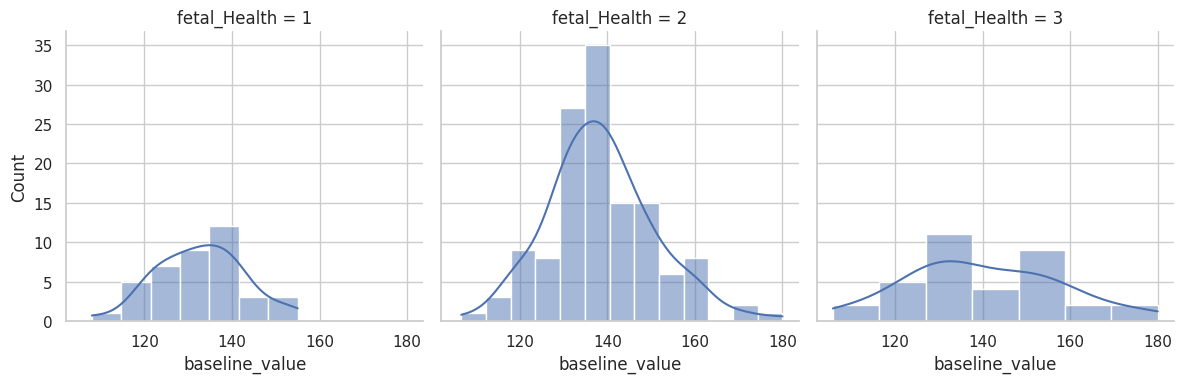

In [73]:
# Facet Grids
g = sns.FacetGrid(data, col='fetal_Health', height=4)
g.map(sns.histplot, 'baseline_value', kde=True)
plt.show()


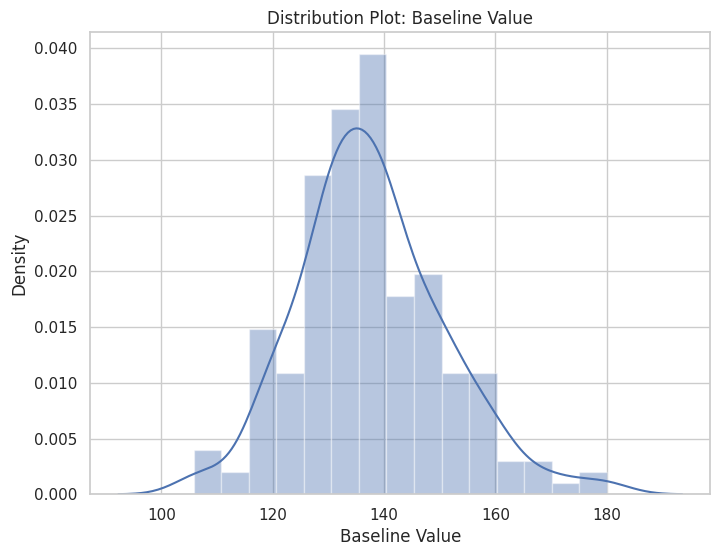

In [74]:
# Distribution Plot for a single numeric variable
plt.figure(figsize=(8, 6))
sns.distplot(data['baseline_value'], kde=True)
plt.title("Distribution Plot: Baseline Value")
plt.xlabel("Baseline Value")
plt.ylabel("Density")
plt.show()


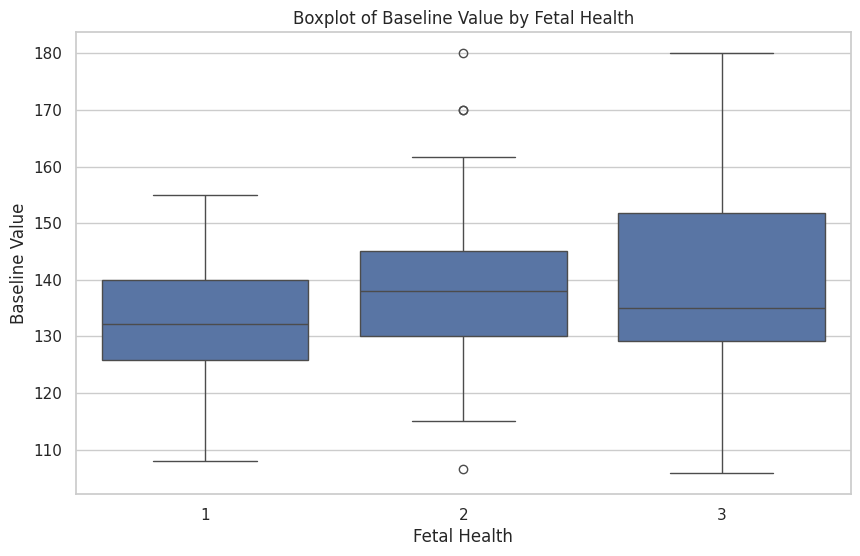

In [75]:
# Boxplots of 'baseline value' for each category of 'fetal_health'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fetal_Health', y='baseline_value', data=data)
plt.title("Boxplot of Baseline Value by Fetal Health")
plt.xlabel("Fetal Health")
plt.ylabel("Baseline Value")
plt.show()


# **Data analysis**

# **Detecting outliers**

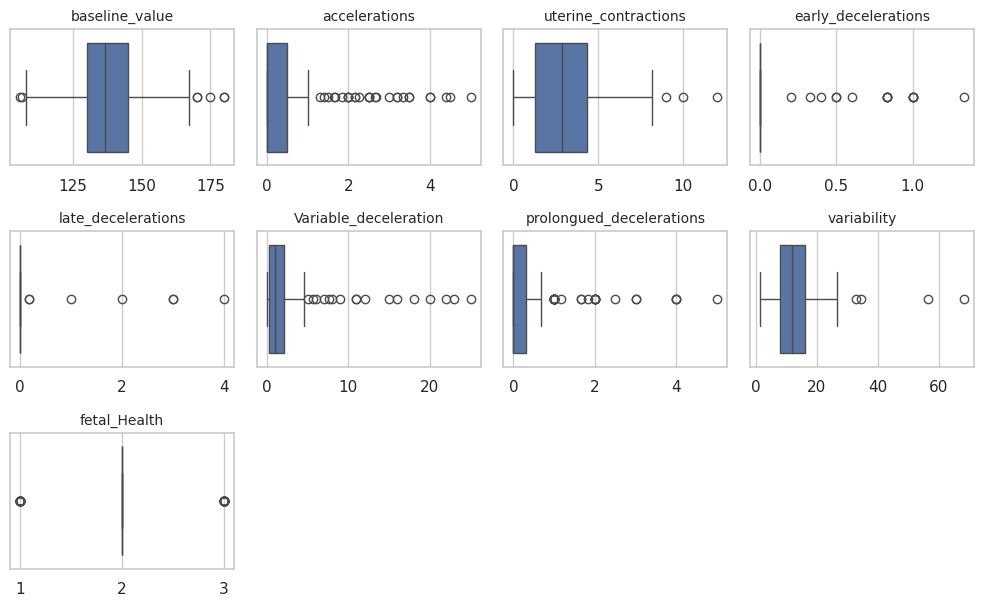

In [76]:
fig, axes = plt.subplots(6, 4, figsize=(10, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"{column}", fontsize=10)
    axes[i].set_xlabel("")
for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# **Spliting X and y sets**

# **Spliting test and training sets**

In [77]:
#assigning values to features as X and target as y
X=data.drop(["fetal_Health"],axis=1)
y=data["fetal_Health"]

In [78]:
X

,baseline_value,accelerations,uterine_contractions,early_decelerations,late_decelerations,Variable_deceleration,prolongued_decelerations,variability
0,134.830000,0.000000,3.083000,0.83,0.0,2.330000,0.0,15.000000
1,132.000000,0.000000,0.600000,0.00,0.0,0.000000,0.0,20.000000
2,119.830000,3.000000,0.000000,0.00,0.0,0.000000,0.0,23.000000
3,141.000000,0.000000,1.000000,0.00,0.0,0.840000,0.0,4.000000
4,146.160000,0.000000,0.000000,0.00,0.0,0.160000,0.0,20.000000
...,...,...,...,...,...,...,...,...
200,132.448110,0.000000,1.281095,0.00,0.0,0.328828,4.0,3.000000
201,132.356128,0.589681,1.314611,0.00,0.0,0.000000,0.0,10.916595
202,132.165482,0.000000,1.328157,0.00,0.0,0.335349,0.0,10.840194
203,132.068063,0.563840,1.323590,0.00,0.0,0.000000,0.0,10.872587


In [79]:
y.shape

(205,)

In [80]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size=0.3 ,
                                                   random_state=42)

fetal_Health
2    130
1     40
3     35
Name: count, dtype: int64


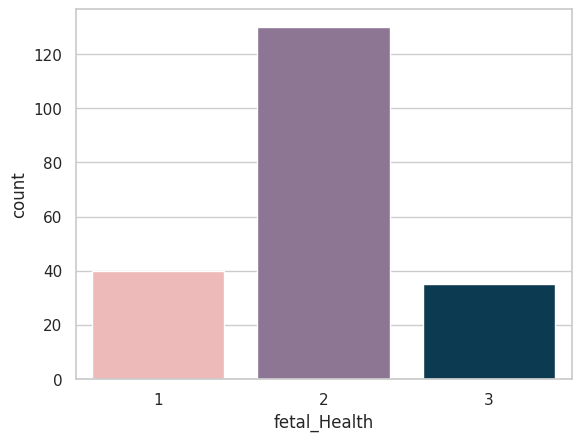

In [81]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_Health",palette=colours)
import pandas as pd

class_counts = data['fetal_Health'].value_counts()
print(class_counts)

# **Oversampeling**

In [82]:
import imblearn
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='not majority')

# Resample the training data
X_over, y_over = smote.fit_resample(X_train, y_train)


In [83]:
y

0      2
1      1
2      1
3      2
4      2
      ..
200    3
201    1
202    2
203    1
204    2
Name: fetal_Health, Length: 205, dtype: int64

In [84]:
X_over.shape

(270, 8)

In [85]:
y_over.shape

(270,)

# **StandardScaler**

In [86]:
# Scale X
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_over)
X_scaled=pd.DataFrame(X_scaled,columns=X_over.columns)
X_scaled.shape

(270, 8)

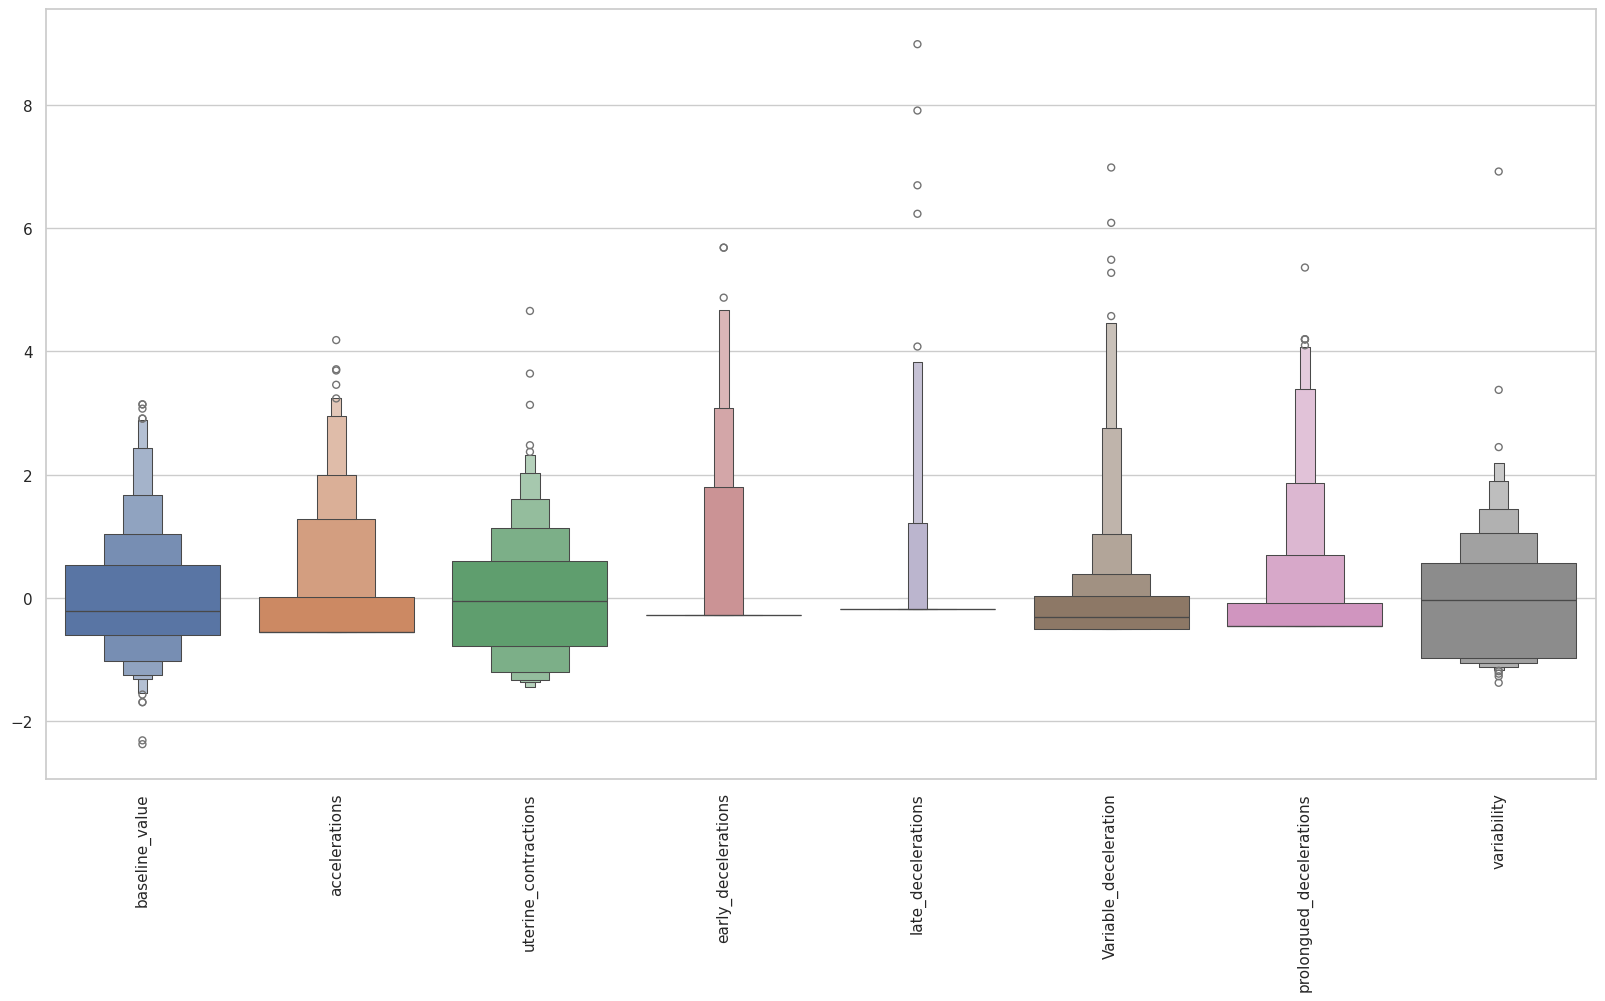

<Figure size 640x480 with 0 Axes>

In [87]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled)
plt.xticks(rotation=90)
plt.show()
plt.savefig('Stander1.png')

In [88]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

# **Features** **Selection**

# **SelectKbest**

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif


bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X_scaled, y_over)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_scaled.columns)

In [90]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

                    Feature      Score
1             accelerations  98.196660
7               variability  61.445558
6  prolongued_decelerations  30.794273
2      uterine_contractions  21.530930
5     Variable_deceleration  19.195914
0            baseline_value  15.022361
4        late_decelerations   8.056319
3       early_decelerations   6.093110


Text(0.5, 1.0, 'Feature Importance')

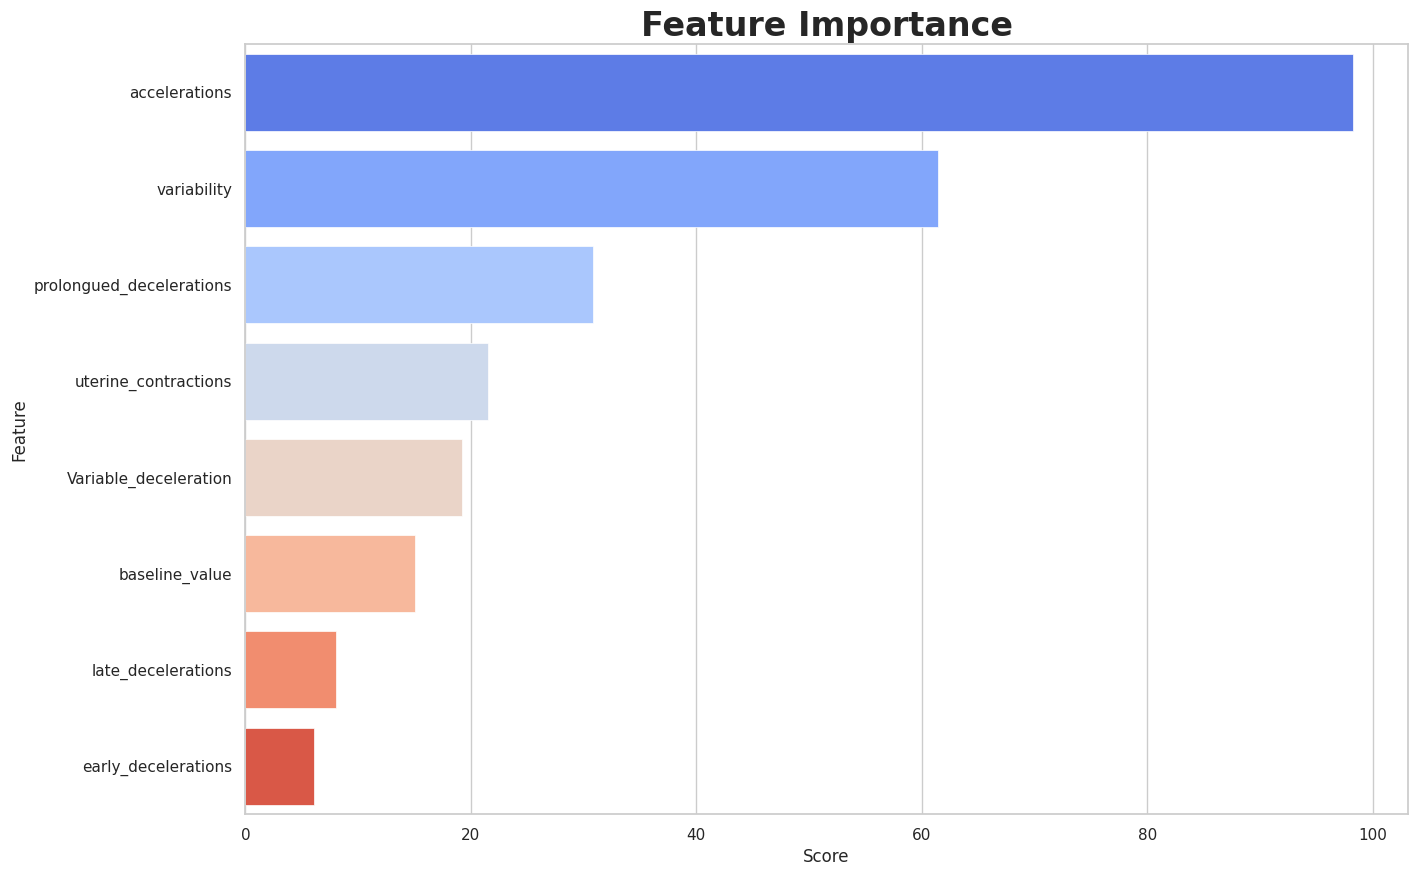

In [91]:
# Visualize the importance scores
fig, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,
                   orient='h')

plt.title('Feature Importance',
          fontsize=24,
          fontweight='bold')

## **Lasso**

In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y_over)
coef_abs = np.abs(lasso.coef_)
sorted_features = np.argsort(coef_abs)[::-1]
k = 10
selected_features = sorted_features[:k]
feature_names = X.columns
print("Selected Features:")
for feature in selected_features:
    print(f"- {feature_names[feature]}")
X_train_selected = X_scaled.iloc[:, selected_features]
X_test_selected = scaled_X_test.iloc[:, selected_features]

Selected Features:
- accelerations
- prolongued_decelerations
- variability
- uterine_contractions
- baseline_value
- late_decelerations
- Variable_deceleration
- early_decelerations


In [94]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Define the classifier
clf = LinearRegression()

# Initialize SequentialFeatureSelector for backward selection
sfs_backward = SFS(clf,
                   k_features='best',
                   forward=False,  # for backward selection
                   floating=False,
                   scoring='r2',
                   cv=5)

# Fit SFS on your training data
sfs_backward = sfs_backward.fit(X_scaled, y_over)

# Get the selected feature names
selected_features_backward = list(sfs_backward.k_feature_names_)
print("Selected features (Backward Selection):")
print(selected_features_backward)

# Filter your original training and test datasets
X_train_selected_b = X_scaled[selected_features_backward]
X_test_selected_b = scaled_X_test[selected_features_backward]

Selected features (Backward Selection):
['baseline_value', 'accelerations', 'uterine_contractions', 'early_decelerations', 'late_decelerations', 'prolongued_decelerations', 'variability']


In [95]:
sfs = SFS(clf,
          k_features='best',
          forward=True,
          floating=True,  # This enables stepwise selection
          scoring='r2',
          cv=5)

# Fit SFS on your training data
sfs = sfs.fit(X_scaled, y_over)

# Get the selected feature names
selected_feature_indices = list(sfs.k_feature_idx_)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
print("Selected feature names (Stepwise Selection):")
print(selected_feature_names)

# Optionally, transform your datasets to contain only selected features
X_train_selected_s = sfs.transform(X_scaled)
X_test_selected_s = sfs.transform(scaled_X_test)

Selected feature names (Stepwise Selection):
['baseline_value', 'accelerations', 'uterine_contractions', 'early_decelerations', 'late_decelerations', 'prolongued_decelerations', 'variability']


# **Models**

## Machine Learning Algorithms

### DecisionTree Classifier and RandomForest Classifier

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the parameters grid for Decision Tree
param_grid_dt = {
    'dt_classifier__criterion': ['gini', 'entropy'],
    'dt_classifier__max_depth': [None, 10, 20, 30],
    'dt_classifier__min_samples_split': [2, 5, 10],
    'dt_classifier__min_samples_leaf': [1, 2, 4]
}

pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])

# List of all the pipelines
pipelines = [pipeline_dt, pipeline_rf]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest'}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt, cv=10, n_jobs=-1)

# Fit GridSearchCV
grid_search_dt.fit(X_scaled, y_over)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Score for Decision Tree:", best_score_dt)

# Update the Decision Tree pipeline with the best parameters
pipeline_dt.set_params(**best_params_dt)

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_scaled, y_over)

# Add the optimized Decision Tree pipeline to the list of pipelines
pipelines[0] = pipeline_dt

# Initialize the list to store the cross-validation accuracy scores
cv_results_accuracy = []

# Now, evaluate the performance of the pipelines with cross-validation and test data
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_scaled, y_over, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Calculate precision, recall, and F1-score for each model
precision_scores = []
recall_scores = []
f1_scores = []

for i, model in enumerate(pipelines):
    y_pred = model.predict(scaled_X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append the scores to respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print the scores for each model
    print(f"{pipe_dict[i]} Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Best Parameters for Decision Tree: {'dt_classifier__criterion': 'entropy', 'dt_classifier__max_depth': None, 'dt_classifier__min_samples_leaf': 1, 'dt_classifier__min_samples_split': 10}
Best Score for Decision Tree: 0.8777777777777777
Decision Tree: 0.877778 
RandomForest: 0.925926 
Decision Tree Precision: 0.8487, Recall: 0.8670, F1-score: 0.8571
RandomForest Precision: 0.9015, Recall: 0.8836, F1-score: 0.8920


### GridSearchCV

In [98]:
parameters = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4, 8],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1, 1]
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_scaled, y_over)

CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'n_jobs': 1}

In [99]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_scaled, y_over)
#Testing the Model on test set
predictions=RF_model.predict(scaled_X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.967741935483871

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming y_test and predictions are defined

recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results after GridSearchCv *********")
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

********* Random Forest Results after GridSearchCv *********
Recall: 0.967741935483871
Precision: 0.9692780337941628
F1 Score: 0.967741935483871


In [101]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.95      1.00      0.98        40
           3       1.00      0.89      0.94         9

    accuracy                           0.97        62
   macro avg       0.98      0.94      0.96        62
weighted avg       0.97      0.97      0.97        62



<Axes: >

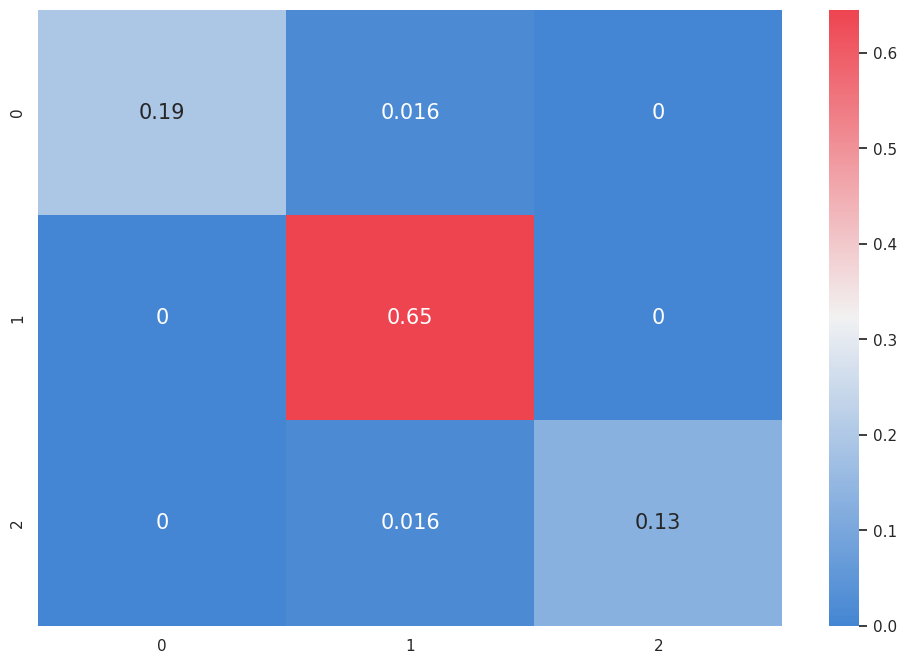

In [102]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

# KNN Classifier

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # List of neighbors to try
    'weights': ['uniform', 'distance'],  # Weighting schemes to try
    'metric': ['euclidean', 'manhattan']  # Distance metrics to try
}

# Create the KNN classifier
knn_clf = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_over, y_over)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the KNN classifier
best_knn_clf = KNeighborsClassifier(**best_params)
best_knn_clf.fit(X_over, y_over)

# Evaluate the best KNN classifier on the test set
y_pred_best_knn = best_knn_clf.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn, recall_best_knn, fscore_best_knn, _ = precision_recall_fscore_support(y_test, y_pred_best_knn, average='weighted')

# Print the results for the best KNN classifier
print("Accuracy for Best KNN Classifier:", accuracy_best_knn)
print("Precision for Best KNN Classifier:", precision_best_knn)
print("Recall for Best KNN Classifier:", recall_best_knn)
print("F-score for Best KNN Classifier:", fscore_best_knn)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.8481481481481481
Accuracy for Best KNN Classifier: 0.7903225806451613
Precision for Best KNN Classifier: 0.7903225806451613
Recall for Best KNN Classifier: 0.7903225806451613
F-score for Best KNN Classifier: 0.7903225806451613


### SVC Classifier

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
# Define and train SVC without grid search
svc = SVC(random_state=42)
svc.fit(X_scaled, y_over)

# Predictions
y_pred_svc = svc.predict(scaled_X_test)

# Metrics calculation
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='macro')
recall_svc = recall_score(y_test, y_pred_svc, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')

# Print metrics
print("Without GridSearchCV:")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-score: {f1_svc:.4f}")


Without GridSearchCV:
Accuracy: 0.8226
Precision: 0.7802
Recall: 0.8277
F1-score: 0.7948


In [106]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
              # ,'linear','sigmoid'

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_scaled, y_over)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions using the best estimator from grid search
y_pred_best = grid.best_estimator_.predict(scaled_X_test)

# Precision, Recall, and F1-score calculation
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

# Print the best parameters, accuracy, precision, recall, and F1-score
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)

accuracy_with_tuning = grid.best_score_ * 100
print("Accuracy for our training dataset with tuning is: {:.2f}%".format(accuracy_with_tuning))

print("Precision: {:.4f}".format(precision_best))
print("Recall: {:.4f}".format(recall_best))
print("F1-score: {:.4f}".format(f1_best))


Best parameters found by GridSearchCV:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy for our training dataset with tuning is: 89.26%
Precision: 0.7971
Recall: 0.8360
F1-score: 0.8137


In [108]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.65      1.00      0.78        40
           3       0.00      0.00      0.00         9

    accuracy                           0.65        62
   macro avg       0.22      0.33      0.26        62
weighted avg       0.42      0.65      0.51        62



In [109]:
print(classification_report(y_test,grid.best_estimator_.predict(scaled_X_test)))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        13
           2       0.89      0.85      0.87        40
           3       0.73      0.89      0.80         9

    accuracy                           0.84        62
   macro avg       0.80      0.84      0.81        62
weighted avg       0.84      0.84      0.84        62



## Deep Learning Algorithms

### TabNet Classifier

In [110]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [111]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [112]:
# TabNet

# Convert data to numpy arrays
X_train_np = X.values
y_train_np = y.values
X_test_np = X_test.values
y_test_np = y_test.values

# Define and train TabNet model
tabnet_model = TabNetClassifier()
tabnet_model.fit(X_train_np, y_train_np, eval_set=[(X_train_np, y_train_np)], patience=10, max_epochs=100)


from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = tabnet_model.predict(X_test_np)

# Evaluate accuracy
accuracy = accuracy_score(y_test_np, y_pred)
print("Accuracy:", accuracy)

epoch 0  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_accuracy: 0.60976 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_accuracy = 0.60976
Accuracy: 0.6290322580645161


### ANN Classifier

In [113]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the ANN classifier
ann_classifier = MLPClassifier(random_state=42)

# Train the classifier
ann_classifier.fit(X_train, y_train)

# Make predictions
y_pred_ann = ann_classifier.predict(X_test)

# Calculate metrics
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann, average='macro')
recall_ann = recall_score(y_test, y_pred_ann, average='macro')
f1_ann = f1_score(y_test, y_pred_ann, average='macro')

# Print the metrics
print("Accuracy: {:.4f}".format(accuracy_ann))
print("Precision: {:.4f}".format(precision_ann))
print("Recall: {:.4f}".format(recall_ann))
print("F1-score: {:.4f}".format(f1_ann))


Accuracy: 0.6452
Precision: 0.2151
Recall: 0.3333
F1-score: 0.2614


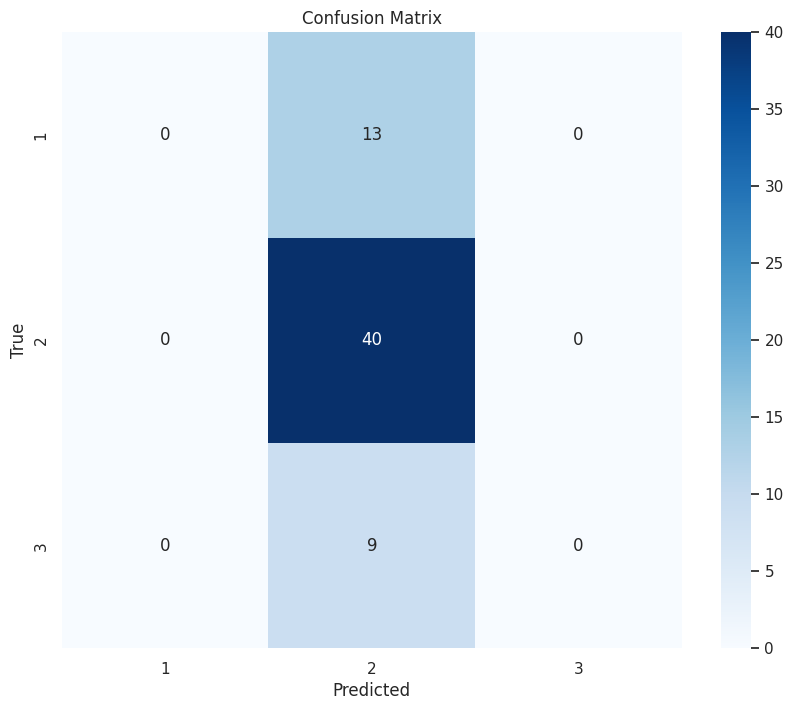

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=ann_classifier.classes_, yticklabels=ann_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Sequential Neural Network

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Adjust labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Determine the number of classes
num_classes = len(set(y_train_adjusted))

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_adjusted, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy_transfer = model.evaluate(X_test, y_test_adjusted)

# Print the accuracy
print("Accuracy:", accuracy_transfer)

Epoch 1/10
4/4 [==============================] - 5s 308ms/step - loss: 18.4260 - accuracy: 0.3684 - val_loss: 4.1122 - val_accuracy: 0.1379
Epoch 2/10
4/4 [==============================] - 0s 64ms/step - loss: 17.2885 - accuracy: 0.4123 - val_loss: 1.9997 - val_accuracy: 0.7586
Epoch 3/10
4/4 [==============================] - 0s 79ms/step - loss: 13.9694 - accuracy: 0.4298 - val_loss: 3.6370 - val_accuracy: 0.7586
Epoch 4/10
4/4 [==============================] - 0s 68ms/step - loss: 14.3522 - accuracy: 0.4386 - val_loss: 3.8640 - val_accuracy: 0.7586
Epoch 5/10
4/4 [==============================] - 0s 75ms/step - loss: 13.2097 - accuracy: 0.4035 - val_loss: 3.5241 - val_accuracy: 0.7586
Epoch 6/10
4/4 [==============================] - 0s 61ms/step - loss: 11.4071 - accuracy: 0.4386 - val_loss: 2.9429 - val_accuracy: 0.7586
Epoch 7/10
4/4 [==============================] - 0s 51ms/step - loss: 10.6129 - accuracy: 0.4649 - val_loss: 2.4555 - val_accuracy: 0.7586
Epoch 8/10
4/4 [===

## Ensemble Learning Algorithms

### Voting Classifier

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


voting_classifier = VotingClassifier(
    estimators=[ ('dt', pipeline_dt), ('svc', svc), ('rf', RF_model)],
    voting='hard'  # Voting strategy: 'hard' for majority voting, 'soft' for weighted voting
)

# Train Voting Classifier
voting_classifier.fit(X_scaled, y_over)

# Make predictions
y_pred = voting_classifier.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)


Accuracy: 0.9354838709677419
Precision: 0.9387096774193548
Recall: 0.9354838709677419
F-score: 0.9364346349745332


### AdaBoost Classifier

In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train AdaBoostClassifier
adaboost_model.fit(X_scaled, y_over)

# Make predictions
y_pred = adaboost_model.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print metrics
print("Evaluation Metrics for AdaBoost Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)

Evaluation Metrics for AdaBoost Model:
Accuracy: 0.8870967741935484
Precision: 0.9066180235535073
Recall: 0.8870967741935484
F-score: 0.8929132868012324


### Bagging Classifier

In [119]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the BaggingClassifier with the base classifier
bagging_model = BaggingClassifier(
    base_estimator=base_classifier,
    n_estimators=10,  # Number of base classifiers in the ensemble
    random_state=42
)

# Fit the BaggingClassifier
bagging_model.fit(X_scaled, y_over)

# Make predictions
y_pred_bagging = bagging_model.predict(scaled_X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging, average="weighted")
recall = recall_score(y_test, y_pred_bagging, average="weighted")
f1 = f1_score(y_test, y_pred_bagging, average="weighted")

# Print evaluation metrics
print("Evaluation Metrics for Bagging Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation Metrics for Bagging Model:
Accuracy: 0.8871
Precision: 0.9127
Recall: 0.8871
F1 Score: 0.8910


### Stacking Classifier


In [120]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
stacking_model = StackingClassifier(
    estimators=[
        ('rf', RF_model),
        ('dt', pipeline_dt),
        ('SVC', grid)
    ],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_scaled, y_over)
y_pred_stacking = stacking_model.predict(scaled_X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy for Stacking Model:", accuracy_stacking)

from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_stacking, average='weighted')

# Print precision, recall, and F-score
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [121]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Create the AdaBoost Classifier
base_estimator = DecisionTreeClassifier(random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the AdaBoost Classifier
ada_clf.fit(X_over, y_over)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(ada_clf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Cross-Validation Mean Accuracy:", cv_scores.mean())

# Evaluate the model on the test set
y_pred_ada = ada_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_ada, average='weighted')

# Print the results
print("Accuracy for AdaBoost:", accuracy_ada)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)

Cross-Validation Scores: [0.90243902 0.85365854 0.85365854 0.87804878 0.75609756]
Cross-Validation Mean Accuracy: 0.8487804878048781
Accuracy for AdaBoost: 0.8870967741935484
Precision: 0.9066180235535073
Recall: 0.8870967741935484
F-score: 0.8929132868012324
